# Sea ice concentration (siconc)

## Imports & defaults

In [ ]:
import os

os.chdir(os.path.dirname(os.getcwd()))

In [1]:
import libs.analysis
import libs.plot
import libs.utils
import libs.vars
import matplotlib
import numpy as np
import xarray

matplotlib.rcParams.update({ 'font.size': 18 })

import warnings
warnings.filterwarnings('ignore')

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## Data

In [2]:
path_nsidc_mask = '_data/_cache/NSIDC_Regions_Masks_Ocean_nearest_s2d.nc'
nsidc_mask = xarray.open_mfdataset(paths=path_nsidc_mask, combine='by_coords').mask
area_units = 'km²'
siconc_units = '%'

areacello = libs.utils.get_data('Ofx', 'piControl', 'UKESM1-0-LL', 'areacello', 'r1i1p1f2').areacello
areacello_w = areacello.fillna(0)

nsidc_all = [
    r for r in libs.vars.nsidc_regions() if r['label'] == 'All'
][0]

siconc_base = libs.utils.get_data('SImon', 'ssp585', 'UKESM1-0-LL', 'siconc', 'r2i1p1f2')
siconc = siconc_base.siconc\
    .where(siconc_base.siconc.latitude > 60)\
    .where(np.isin(nsidc_mask.values, nsidc_all['values']))

si_arr = [
    {
        'color': '#1982C4',
        'data': siconc,
        'label': 'siconc'
    }
]

si_arr_weighted_sum = []
for item in si_arr:
    si_weighted = (siconc / (1000 * 1000 * 100)).weighted(areacello_w)
    si_weighted_sum = si_weighted.sum(dim=si_weighted.weights.dims, skipna=True)

    si_arr_weighted_sum.append({
        'color': '#1982C4',
        'data': si_weighted_sum,
        'label': item['label']
    })

ensemble_time_slices = libs.analysis.generate_slices(si_arr)
colormesh_kwargs = {
    'extend': 'neither',
    'levels': 11,
    'vmin': 0,
    'vmax': 100,
    'x': 'longitude', 
    'y': 'latitude'
}
time_title = '{time} SSP585 {label} 60-90°N ({units})'

## Time series

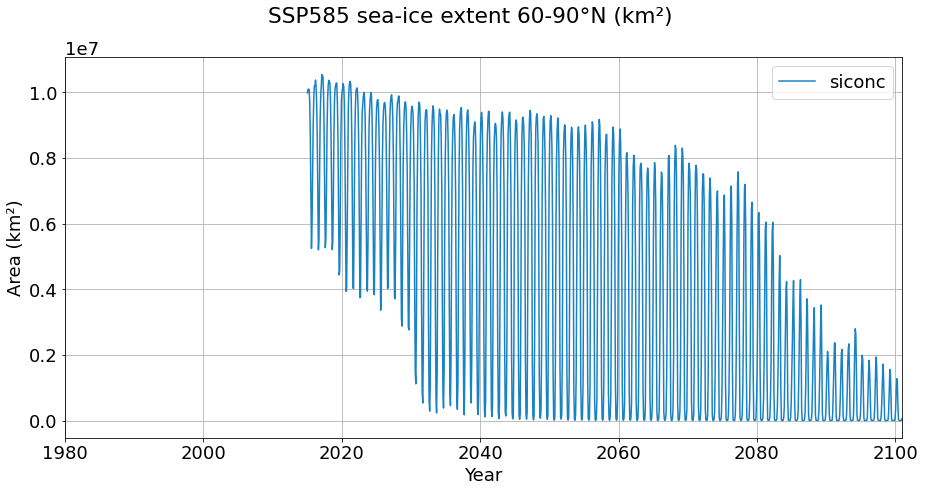

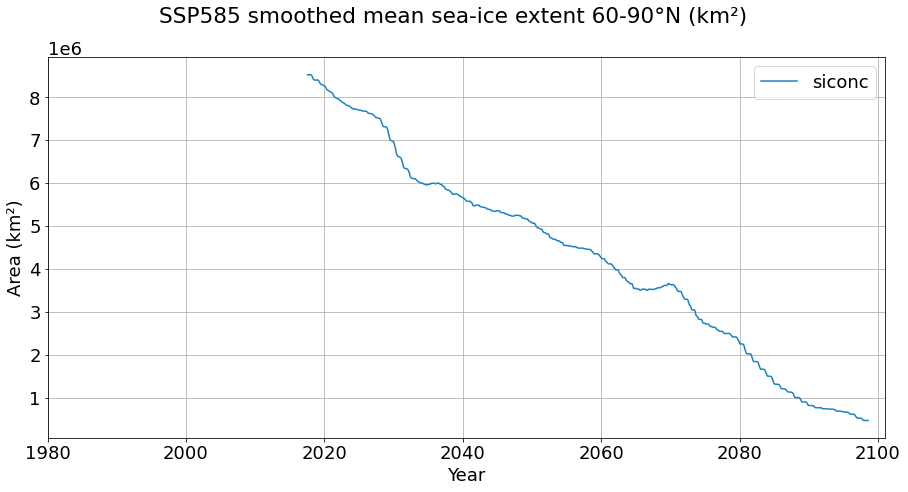

In [3]:
libs.plot.time_series(
    si_arr_weighted_sum,
    title=f'SSP585 sea-ice extent 60-90°N ({area_units})',
    xattr='time',
    ylabel=f'Area ({area_units})'
)

libs.plot.time_series(
    si_arr_weighted_sum,
    title=f'SSP585 smoothed mean sea-ice extent 60-90°N ({area_units})',
    xattr='time',
    ylabel=f'Area ({area_units})',
    process=lambda x: libs.analysis.smoothed_mean(x)
)

## Monthly variability

### Full region (time)

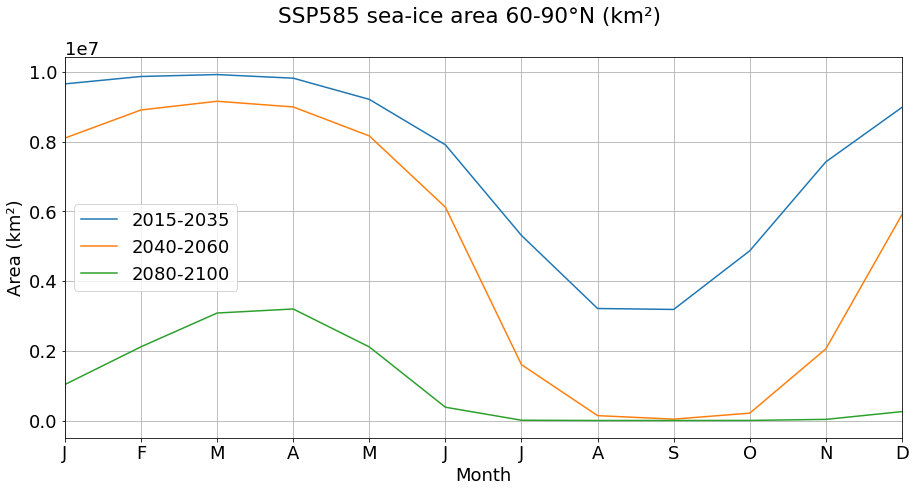

In [4]:
si_arr_monthly = [{ 
    'color': None,
    'data': libs.analysis.monthly_weighted(
        s['ensemble'][0]['data'] / (1000 * 1000 * 100), 
        areacello_w,
        method='sum'
    ),
    'label': s['label']
} for s in ensemble_time_slices]

libs.plot.monthly_variability(
    si_arr_monthly,
    title=f'SSP585 sea-ice area 60-90°N ({area_units})',
    ylabel=f'Area ({area_units})'
)

### Regional sea-ice area (time)

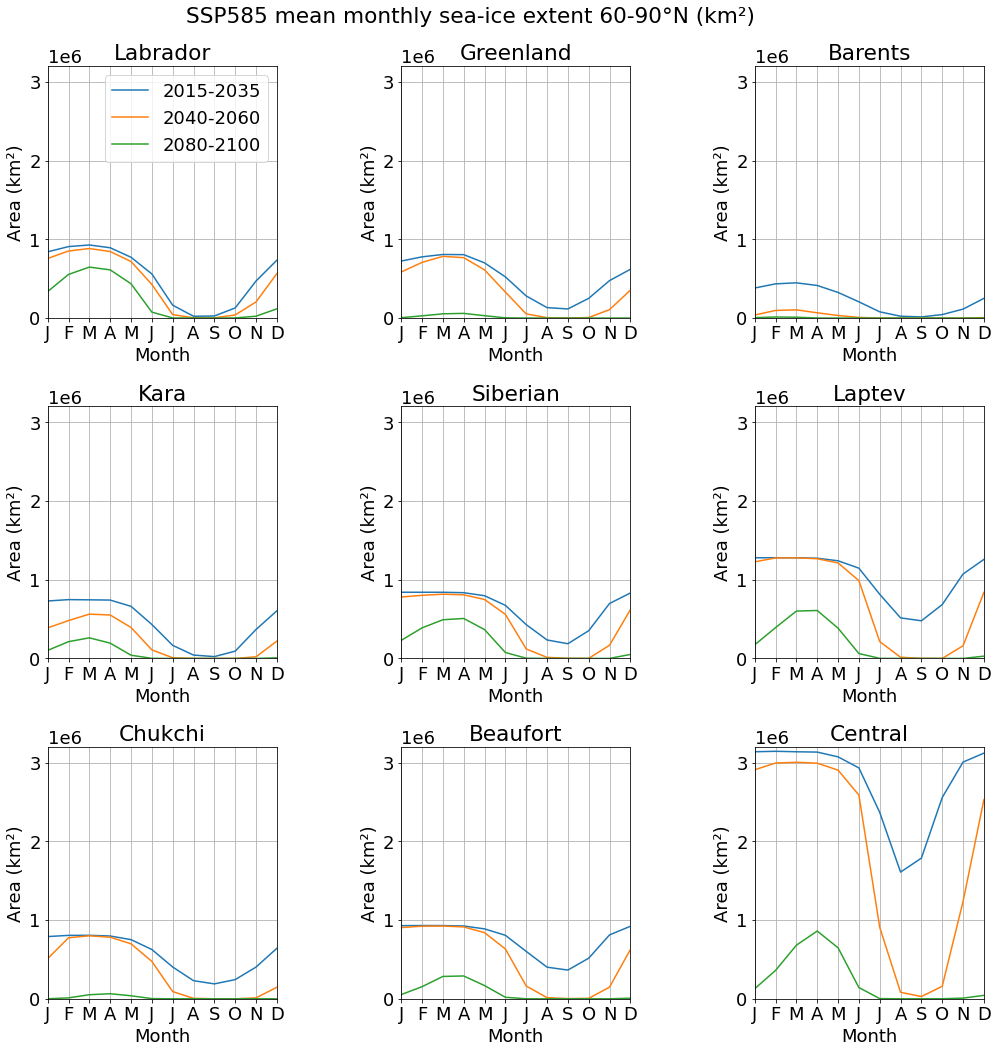

In [5]:
si_arr_slices = [{ 
    'color': None,
    'data': s['ensemble'][0]['data'],
    'label': s['label']
} for s in ensemble_time_slices]

libs.plot.monthly_variability_regional(
    si_arr_slices, 
    title=f'SSP585 mean monthly sea-ice extent 60-90°N ({area_units})',
    ylabel=f'Area ({area_units})',
    mask_type='ocean',
    process=lambda x: libs.analysis.monthly_weighted(x / (1000 * 1000 * 100), areacello_w),
    ylim=(0, 3.2e6)
)

### Full region (spatial)

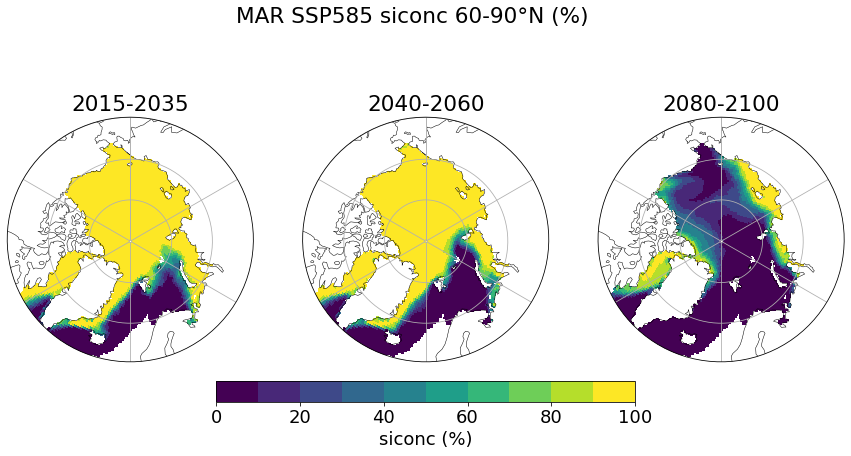

In [6]:
libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    col_var='time_slices',
    colormesh_kwargs=colormesh_kwargs,
    time='MAR',
    title=time_title,
    units=siconc_units
)

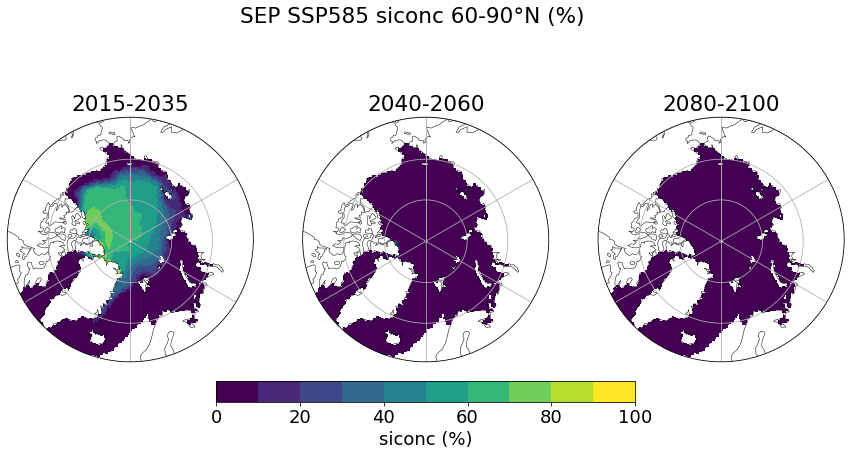

In [7]:
libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    col_var='time_slices',
    colormesh_kwargs=colormesh_kwargs,
    time='SEP',
    title=time_title,
    units=siconc_units
)

## Seasonal variability (spatial)

### MAM

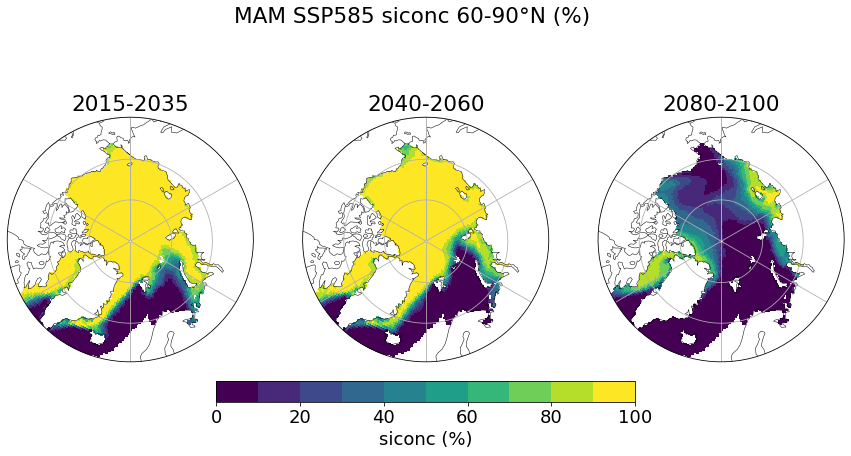

In [8]:
libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    col_var='time_slices',
    colormesh_kwargs=colormesh_kwargs,
    division='season',
    units=siconc_units,
    time='MAM',
    title=time_title
)

### JJA

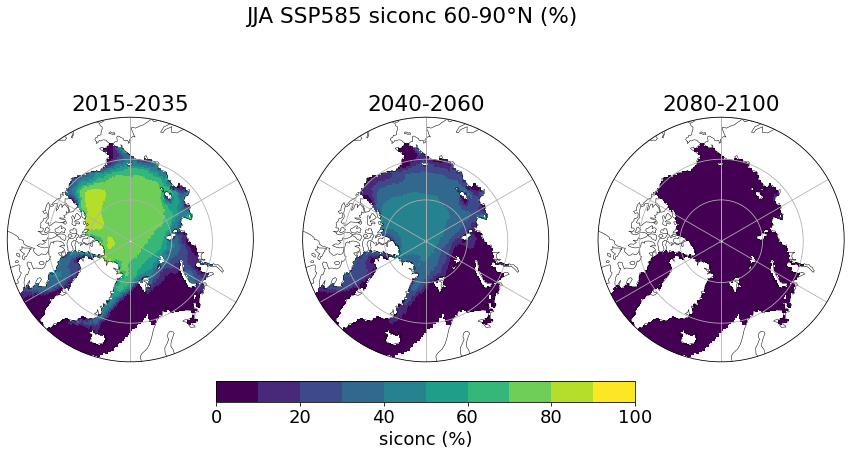

In [9]:
libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    col_var='time_slices',
    colormesh_kwargs=colormesh_kwargs,
    division='season',
    units=siconc_units,
    time='JJA',
    title=time_title
)

### SON

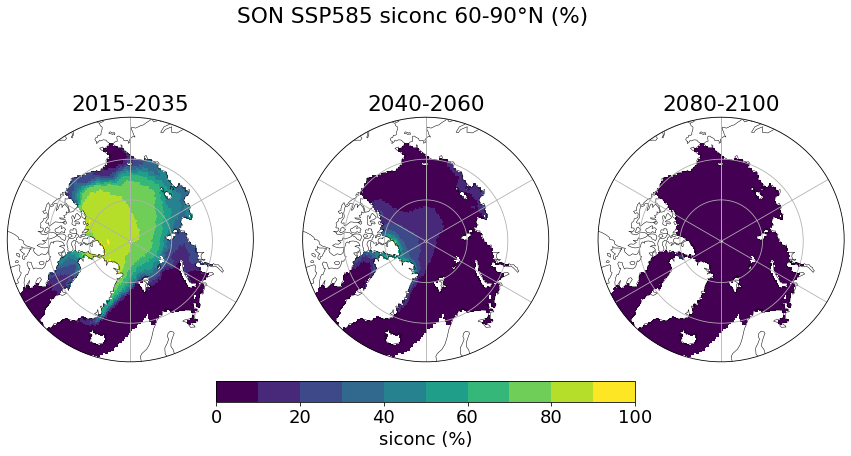

In [10]:
libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    col_var='time_slices',
    colormesh_kwargs=colormesh_kwargs,
    division='season',
    units=siconc_units,
    time='SON',
    title=time_title
)

### DJF

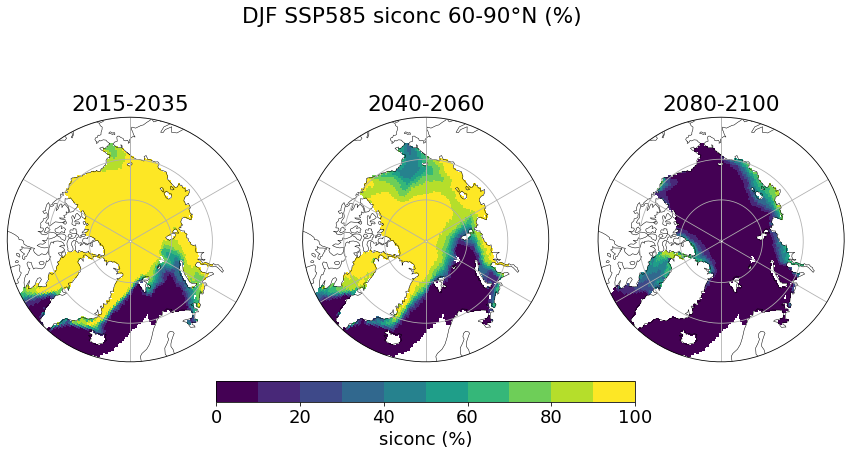

In [11]:
libs.plot.calendar_division_spatial(
    ensemble_time_slices, 
    col_var='time_slices',
    colormesh_kwargs=colormesh_kwargs,
    division='season',
    units=siconc_units,
    time='DJF',
    title=time_title
)